In [1]:
#importing basic libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read our data

In [4]:
train_data=pd.read_excel('D:/data/Data_Train.xlsx')

In [5]:
#dealing with missing data

In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
# as i have very less missing data i can drop them

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# perform data cleaning 

In [12]:
train_data.dtypes



Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
#function to make obj to datetime

In [14]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    

In [15]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [17]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-07 05:50:00,2021-08-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-07 18:05:00,2021-08-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-07 16:50:00,2021-08-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [20]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [22]:
extract_hour(train_data,'Dep_Time')
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
extract_min(train_data,'Dep_Time')

In [23]:
drop_column(train_data,'Arrival_Time')

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-07 22:20:00,2h 50m,non-stop,No info,3897,24,3,22,1,10,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-07 05:50:00,7h 25m,2 stops,No info,7662,5,1,5,13,15,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-07 09:25:00,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-07 18:05:00,5h 25m,1 stop,No info,6218,5,12,18,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-07 16:50:00,4h 45m,1 stop,No info,13302,3,1,16,21,35,50


In [25]:
duration=list(train_data['Duration'])

In [26]:
for i in range(len(duration)):
    if(len(duration[i].split(' '))==2):
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
            

In [27]:
train_data['Duration']=duration

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-07 22:20:00,2h 50m,non-stop,No info,3897,24,3,22,1,10,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-07 05:50:00,7h 25m,2 stops,No info,7662,5,1,5,13,15,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-07 09:25:00,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-07 18:05:00,5h 25m,1 stop,No info,6218,5,12,18,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-07 16:50:00,4h 45m,1 stop,No info,13302,3,1,16,21,35,50


In [29]:
def hour(x):
    return x.split(' ')[1][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [30]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-07 22:20:00,2h 50m,non-stop,No info,3897,24,3,22,1,10,20,50,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-07 05:50:00,7h 25m,2 stops,No info,7662,5,1,5,13,15,50,25,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-07 09:25:00,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-07 18:05:00,5h 25m,1 stop,No info,6218,5,12,18,23,30,5,25,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-07 16:50:00,4h 45m,1 stop,No info,13302,3,1,16,21,35,50,45,45


In [32]:
drop_column(train_data,'Duration')
drop_column(train_data,'Dep_Time')

In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_minute         int64
Duration_hours         object
Duration_mins          object
dtype: object

In [34]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [35]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_minute         int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [36]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [38]:
#handle categorical data and feature encoding

In [39]:
## categorical data are of two types - Nominal, original
## Nominal Data -- No hierarchy - Onehot
## Original data -- Hierarchy ex. good better best - Label encoding

In [40]:
categorical=train_data[cat_col]

In [41]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


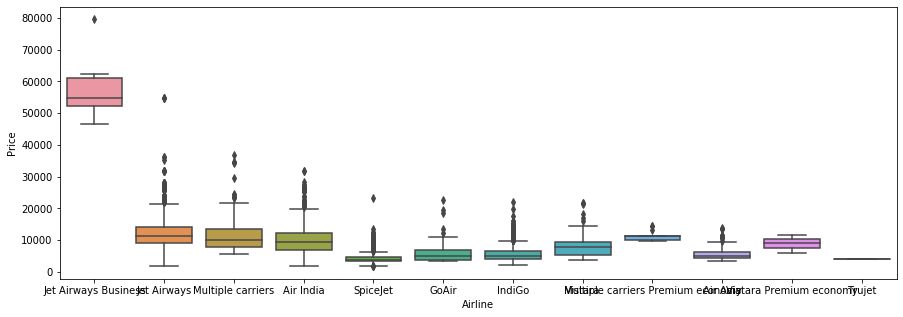

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [43]:
Airline=train_data['Airline']
Airline.head()

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
Name: Airline, dtype: object

In [44]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [45]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
# work with route

In [48]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2'] =categorical['Route'].str.split('→').str[1]
categorical['Route_3'] =categorical['Route'].str.split('→').str[2]
categorical['Route_4'] =categorical['Route'].str.split('→').str[3]
categorical['Route_5'] =categorical['Route'].str.split('→').str[4]
categorical.head()

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
drop_column(categorical,'Route')

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [51]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [52]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [53]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [55]:
## to get rid of high dimentioanl issue we will use label encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder=LabelEncoder()

In [58]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [59]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [61]:
drop_column(categorical,'Additional_Info')

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [63]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [64]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [66]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [67]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,1,10,20,50,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,13,15,50,25,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,4,25,25,0,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,23,30,5,25,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,21,35,50,45,45


In [68]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [69]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,1,10,20,50,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,13,15,50,25,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,4,25,25,0,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,23,30,5,25,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,21,35,50,45,45


In [70]:
## working with outliers

def plot(df,c):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[c],ax=ax1)
    sns.boxplot(df[c],ax=ax2)

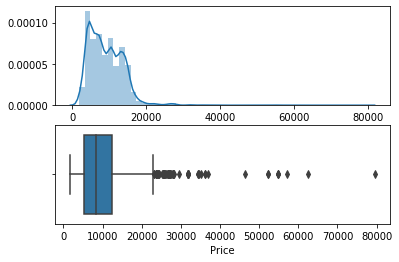

In [71]:
plot(data_train,'Price')

In [72]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

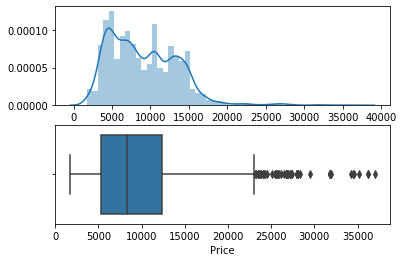

In [73]:
plot(data_train,'Price')

In [74]:
## x - independent features
## y - dependent features

In [75]:
x=data_train.drop('Price',axis=1)
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,0,1,24,3,22,1,10,20,50,50
1,2,2,25,1,3,5,1,0,0,0,...,0,0,5,1,5,13,15,50,25,25
2,2,3,32,4,5,5,0,0,0,1,...,0,0,6,9,9,4,25,25,0,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,5,12,18,23,30,5,25,25
4,1,0,34,8,13,5,0,0,1,0,...,0,1,3,1,16,21,35,50,45,45


In [76]:
x.shape

(10682, 34)

In [77]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [78]:
## select best features using feature selection technique



In [79]:
## for this i'll use info gain

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [81]:
mutual_info_classif(x,y)

array([2.11775887e+00, 2.04323953e+00, 2.78737970e+00, 2.28498791e+00,
       1.45013450e+00, 7.11765704e-01, 7.56323507e-01, 1.09968995e-01,
       6.49024766e-01, 9.21925648e-01, 1.17002456e-02, 5.61966715e-01,
       5.55910357e-03, 3.27650107e-01, 3.07087607e-04, 2.22519421e-01,
       0.00000000e+00, 1.82486099e-01, 1.52250679e+00, 8.71487394e-01,
       2.77240556e-01, 1.52614442e+00, 4.03930217e-01, 2.88024470e-01,
       1.55996463e-01, 3.80776848e-01, 1.05741631e+00, 8.61284319e-01,
       1.44096214e+00, 1.85298237e+00, 1.50985648e+00, 1.19819690e+00,
       1.08194834e+00, 1.08054112e+00])

In [82]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,2.150443
Route_1,2.057009
Route_2,2.772925
Route_3,2.266703
Route_4,1.447366
Route_5,0.729614
Air India,0.788641
GoAir,0.078767
IndiGo,0.681189
Jet Airways,0.941364


In [83]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.772925
Route_3,2.266703
Total_Stops,2.150443
Route_1,2.057009
Arrival_Time_hour,1.846661
Cochin,1.564203
Arrival_Time_minute,1.534241
Delhi,1.516423
Route_4,1.447366
Dep_Time_hour,1.440048


In [84]:
from sklearn.model_selection import train_test_split


In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [90]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('model score {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('predictions are :\n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score is {}'.format(r2_score))
    print('MAE : ',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [91]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\ANUPAM DAS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model score 0.9477221361696113
predictions are :
 [ 8524.7         4735.          5210.2        ... 12586.4
 15219.86666667  5739.        ]


r2 score is 0.8148725179260132
MAE :  1168.7200431735635
MSE :  3556736.3942369972
RMSE :  1885.9311743107162


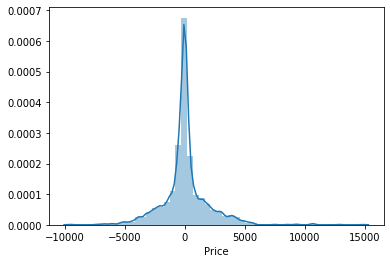

In [92]:
predict(RandomForestRegressor())